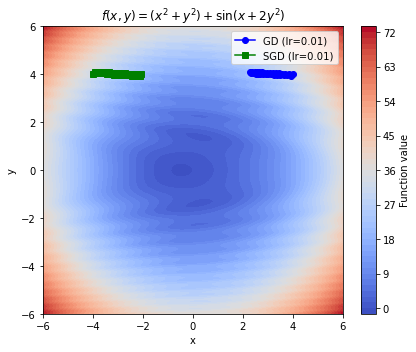

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 定义目标函数
def f(x, y):
    return (x**2 + y**2) + np.sin(x + 2*y**2)

# 定义函数的梯度(用于简单梯度下降演示)
def grad_f(x, y):
    # f(x, y) = (x^2 + y^2) + sin(x + 2y^2)
    # df/dx = 2x + cos(x + 2y^2) * 1
    # df/dy = 2y + cos(x + 2y^2) * (4y)
    dfdx = 2*x + np.cos(x + 2*y**2)
    dfdy = 2*y + 4*y*np.cos(x + 2*y**2)
    return dfdx, dfdy

# 生成网格
x = np.linspace(-6, 6, 200)
y = np.linspace(-6, 6, 200)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# 绘制函数等高线图
fig, ax = plt.subplots(figsize=(6,5))
contour = ax.contourf(X, Y, Z, levels=50, cmap='coolwarm')
cbar = plt.colorbar(contour)
cbar.set_label("Function value")

# 模拟一些优化算法的轨迹，这里简单示例：
# 1. Gradient Descent (GD)
# 2. Stochastic Gradient Descent (SGD) - 随机扰动梯度
# 为简单起见，这里只迭代少量步骤

def run_gradient_descent(x0, y0, lr, steps=30):
    xs = [x0]
    ys = [y0]
    x_c, y_c = x0, y0
    for i in range(steps):
        dfdx, dfdy = grad_f(x_c, y_c)
        x_c = x_c - lr * dfdx
        y_c = y_c - lr * dfdy
        xs.append(x_c)
        ys.append(y_c)
    return np.array(xs), np.array(ys)

def run_sgd(x0, y0, lr, steps=30):
    xs = [x0]
    ys = [y0]
    x_c, y_c = x0, y0
    for i in range(steps):
        dfdx, dfdy = grad_f(x_c, y_c)
        # 为体现"随机性"，给梯度加点随机扰动
        dfdx += np.random.randn()*0.1
        dfdy += np.random.randn()*0.1
        x_c = x_c - lr * dfdx
        y_c = y_c - lr * dfdy
        xs.append(x_c)
        ys.append(y_c)
    return np.array(xs), np.array(ys)

# 生成一条GD轨迹
xs_gd, ys_gd = run_gradient_descent(x0=4.0, y0=4.0, lr=0.01, steps=30)
ax.plot(xs_gd, ys_gd, marker='o', color='blue', label='GD (lr=0.01)')

# 生成一条SGD轨迹
xs_sgd, ys_sgd = run_sgd(x0=-4.0, y0=4.0, lr=0.01, steps=30)
ax.plot(xs_sgd, ys_sgd, marker='s', color='green', label='SGD (lr=0.01)')

ax.set_title(r"$f(x,y) = (x^2 + y^2) + \sin(x + 2y^2)$")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

plt.tight_layout()
plt.show()


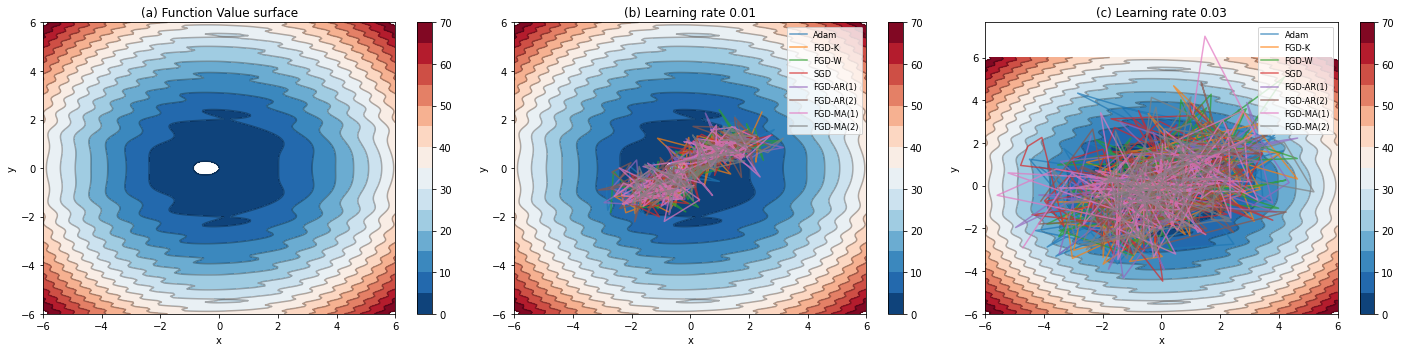

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 定义目标函数
def f(x, y):
    return x**2 + y**2 + np.sin(x + 2*y**2)

# 创建网格点
x = np.linspace(-6, 6, 200)
y = np.linspace(-6, 6, 200)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# 创建三个子图
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

# 绘制函数值等高面
levels = np.linspace(0, 70, 15)

# 第一个子图：函数值等高面
cont1 = ax1.contour(X, Y, Z, levels=levels, colors='black', alpha=0.3)
im1 = ax1.contourf(X, Y, Z, levels=levels, cmap='RdBu_r')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('(a) Function Value surface')

# 第二个子图：学习率0.01的优化轨迹
cont2 = ax2.contour(X, Y, Z, levels=levels, colors='black', alpha=0.3)
im2 = ax2.contourf(X, Y, Z, levels=levels, cmap='RdBu_r')

# 模拟一些优化轨迹
methods = ['Adam', 'FGD-K', 'FGD-W', 'SGD', 'FGD-AR(1)', 'FGD-AR(2)', 'FGD-MA(1)', 'FGD-MA(2)']
for i, method in enumerate(methods):
    # 生成随机轨迹（这里只是示例）
    t = np.linspace(-2, 2, 100)
    ax2.plot(t + np.random.randn(100)*0.5, np.sin(t) + np.random.randn(100)*0.5, 
            label=method, alpha=0.7)

ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('(b) Learning rate 0.01')
ax2.legend(loc='upper right', fontsize='small')

# 第三个子图：学习率0.03的优化轨迹
cont3 = ax3.contour(X, Y, Z, levels=levels, colors='black', alpha=0.3)
im3 = ax3.contourf(X, Y, Z, levels=levels, cmap='RdBu_r')

# 模拟更发散的轨迹
for i, method in enumerate(methods):
    t = np.linspace(-2, 2, 100)
    ax3.plot(t + np.random.randn(100)*1.5, np.sin(t) + np.random.randn(100)*1.5, 
            label=method, alpha=0.7)

ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_title('(c) Learning rate 0.03')
ax3.legend(loc='upper right', fontsize='small')

# 添加颜色条
plt.colorbar(im1, ax=ax1)
plt.colorbar(im2, ax=ax2)
plt.colorbar(im3, ax=ax3)

# 调整布局
plt.tight_layout()
plt.show()